<h3 align="center">Assignment 3: EN4553 (Machine Vision)</h3>
<h4 align="center">180631J Thalagala B. P.</h4>

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from typing import Tuple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# setting parameters for pretty figures
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# fucntion to save figures
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## (a) 
(5 points) Complete the following Python function to read the dataset as a set of arrays. (Hint: you may use the   `np.loadtxt()` function.)

In [3]:
def load_dataset( src_dir: str ) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Load the dataset as a set of numpy arrays.
    Args:
        src_dir: Directory where dataset files are stored.
    Returns:
        (x_train, y_train, x_val, y_val, x_test) tuple where each array is one dimensional.
    """
    # reading data from the files
    x_train = np.loadtxt(src_dir + "/x_train.txt")
    y_train = np.loadtxt(src_dir + "/y_train.txt")
    x_val   = np.loadtxt(src_dir + "/x_val.txt")
    y_val   = np.loadtxt(src_dir + "/y_val.txt")
    x_test  = np.loadtxt(src_dir + "/x_test.txt")
    
    # returning as a tuple
    return x_train, y_train, x_val, y_val, x_test

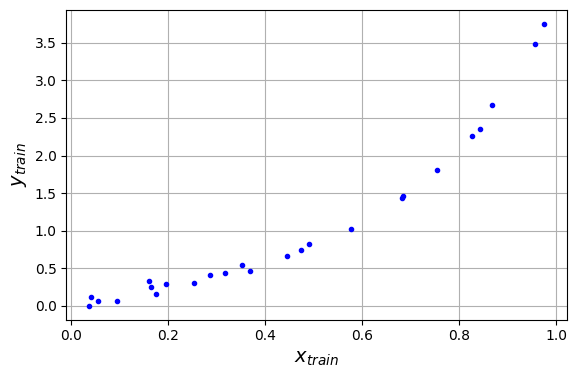

Trainging Dataset size:  (25,)


In [4]:
# visualizing input training data
dataset = load_dataset("180631J")
plt.figure(figsize=(6, 4))
plt.plot(dataset[0], dataset[1], "b.")
plt.xlabel("$x_{train}$")
plt.ylabel("$y_{train}$", rotation=90)
plt.grid()
save_fig("training_data")
plt.show()

print("Trainging Dataset size: ", dataset[0].shape)

## (b) 
We will be fitting a linear regression model $y=\sum_{i=1}^{n} w_i x^i $ where each $w_i$ is a learnable parameter and n is
a hyperparameter. Variables x and y represent rows in `x_train.txt` and `y_train.txt`.

#### i. (5 points) Implement the following function to make input features for the above linear regression model.

In [5]:
def get_features(x: np.ndarray, n: int) -> np.ndarray:
    """Creates n-th degree polynomial features for the given vector x.
    Example usage:
    get_features(np.array([1.0, 2.0, 3.0]), 3) outputs
    np.array([  [ 1., 1., 1.],
                [ 2., 4., 8.],
                [ 3., 9., 27.]])
    Args:
        x: A numpy array of shape (num_examples, ) or (num_examples, 1).
        n: The degree of the polynomial features.
    Returns:
        A matrix of shape (num_examples, n) where the j-th column is equal to
        the vector x raised, elementwise, to the power j.
    """
    
    # create an array of powers 
    powers = np.arange(1, n+1)

    # reshape x to have the shape (num_examples, 1) to be compatible with np.power broadcasing
    x = x.reshape(-1, 1)

    # construct the design matrix of shape (num_examples, n)
    design_matrix = np.power(x, powers)

    # return the design matrix
    return design_matrix

#### ii. (10 points) Use the above function to complete the following implementation. (Hint: you may use the `sklearn.linear_model.LinearRegression` class.)

In [6]:
def fit_and_evaluate(
    x_train: np.ndarray, y_train: np.ndarray,
    x_val: np.ndarray, y_val: np.ndarray,
    n: int
    ) -> Tuple[float, float]:
    
    """Fits an n-th degree polynomial and outputs train and validation MSE.
    Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
    set and outputs the mean-squared-error (MSE) on train and validation sets.
    Args:
    x_train: Input features for the train set. Has shape (num_train, )
    y_train: Targets (labels) for the train set. Has shape (num_train, )
    x_val: Input features for the validation set. Has shape (num_val, )
    y_val: Targets (labels) for the validation set. Has shape (num_val, )
    n: The degree of the polynomial fit. See the above equation.
    Returns:
    (train_mse, val_mse), tuple of MSE on train and validation sets.
    """

    # Generating polynomial features using the defined function
    x_poly_train = get_features(x_train, n)
    x_poly_val   = get_features(x_val, n)
    
    # Fitting a linear regression model to the training set
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, y_train)

    # Generate model predictions for the train set and calculate the MSE.
    y_predict_train = lin_reg.predict(x_poly_train)
    train_mse = mean_squared_error(y_train, y_predict_train)

    # Similarly, calculate the MSE on the val set.
    y_predict_val = lin_reg.predict(x_poly_val)
    val_mse = mean_squared_error(y_val, y_predict_val)
    
    return train_mse, val_mse

## (c) 
(5 points) Use the above function to calculate and plot train and validations MSEs against n = 1, 2, . . . , 10. Include this graph in your answer sheet. Which n value would you pick for your final model?

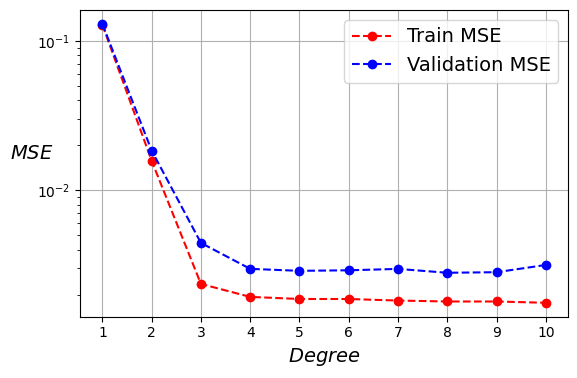

In [7]:
highest_order = 10
degrees = np.arange(1, highest_order+1)
Train_MSE = np.zeros((highest_order,1))
Val_MSE = np.zeros((highest_order,1))

for i in range(1, highest_order +1):
    
    train_mse, val_mse = fit_and_evaluate(
        dataset[0], dataset[1], # x_train, y_train
        dataset[2], dataset[3], # x_val, y_val
        i) # The degree of the polynomial to fit

    Train_MSE[i-1] = train_mse
    Val_MSE[i-1] = val_mse


plt.figure(figsize=(6, 4))
plt.plot(degrees, Train_MSE, "r--o", label="Train MSE")
plt.plot(degrees, Val_MSE, "b--o", label="Validation MSE")
plt.legend(loc="upper right")
plt.xlabel("$Degree$"); plt.xticks(degrees)
plt.ylabel("$MSE$", rotation=0); plt.yscale("log")
plt.grid()
save_fig("train_val_mse")
plt.show()

## (d) 
(5 points) Use the model selected above to make predictions on the test set. Include your predictions in a file named `<your-index-number>_y_predict_test.txt`. For example, `180000X_y_predict_test.txt`.

*Answer* : According to the learning curve, 4th order polynomial fits the data well.

In [8]:
selected_order = 4

# Generating polynomial features using the user defined function
x_poly_train = get_features(dataset[0], selected_order)

# Fitting a linear regression model to the training set
lin_reg = LinearRegression()
lin_reg.fit(x_poly_train, dataset[1])

# predicting on the test data set and save in a file
x_poly_test = get_features(dataset[4], selected_order)
y_predict_test = lin_reg.predict(x_poly_test)
np.savetxt("18063J_y_predict_test.txt", y_predict_test)

# Visualization

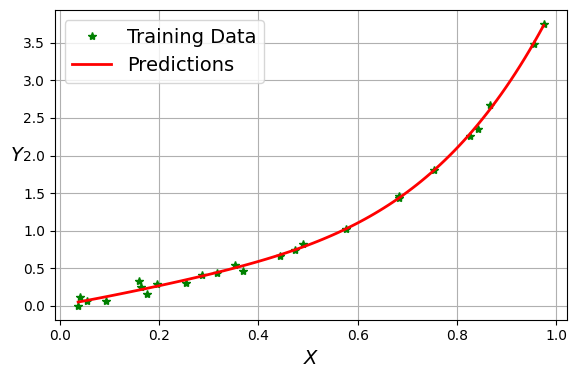

In [9]:
# training data
plt.figure(figsize=(6, 4))
plt.plot(dataset[0], dataset[1], "g*", label="Training Data")

# data to plot the polynomial
data_points = 100
x = np.linspace(np.min(dataset[0]), np.max(dataset[0]), data_points).reshape(data_points, 1)
x_poly = get_features(x, selected_order)
y = lin_reg.predict(x_poly)
plt.plot(x, y, "r-", linewidth=2, label="Predictions")

plt.legend(loc="upper left")
plt.xlabel("$X$")
plt.ylabel("$Y$", rotation=0)
plt.grid()
save_fig("predictions")
plt.show()